# Stroke Prediction Machine Learning Project
#### By Rebecca Ndubuisi, Yusira Mutholib and Zainab Popoola

## Introduction

### Context:

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Data Source: Kaggle - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Attribute Information:

1) id: unique identifier\
2) gender: "Male", "Female" or "Other"\
3) age: age of the patient\
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension\
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease\
6) ever_married: "No" or "Yes"\
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\
8) Residence_type: "Rural" or "Urban"\
9) avg_glucose_level: average glucose level in blood\
10) bmi: body mass index\
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*\
12) stroke: 1 if the patient had a stroke or 0 if not\
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.svm import SVC

## Assessing the Data

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

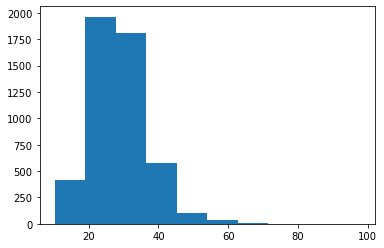

In [7]:
plt.hist(df['bmi'])
plt.show()

In [8]:
df.bmi.median()

28.1

In [9]:
df.bmi.mean()

28.893236911794673

In [10]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Data Cleaning

In [11]:
#Filling unknown data in the bmi column with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

**The Unknown values in the smoking_status column are missing values according to the data information**

In [12]:
#Replacing the Unknown smoking status with the mode of the smoking_status column
df['smoking_status'].replace('Unknown', value=df['smoking_status'].mode()[0], inplace=True)

In [13]:
df['smoking_status'].value_counts()

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [14]:
value_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


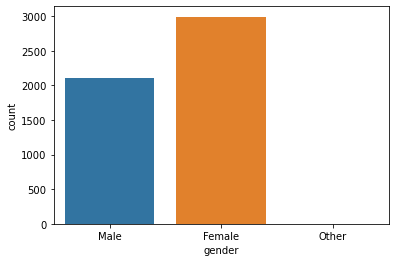

 

hypertension:
0    4612
1     498
Name: hypertension, dtype: int64



C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


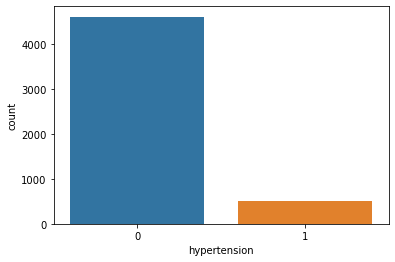

C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 

heart_disease:
0    4834
1     276
Name: heart_disease, dtype: int64



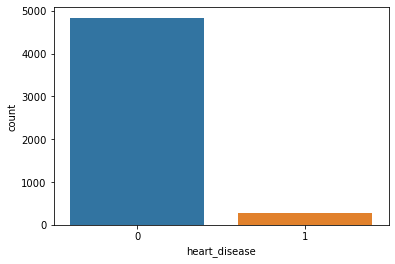

C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


 

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64



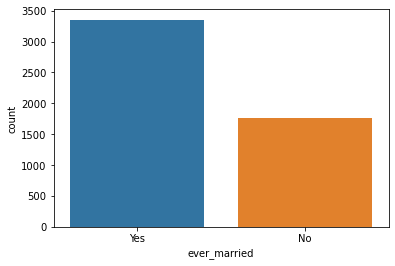

 

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


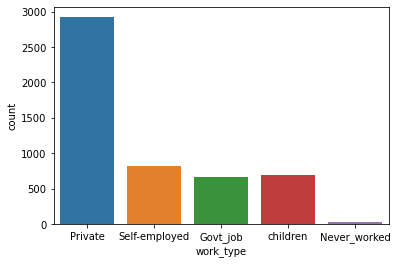

 

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


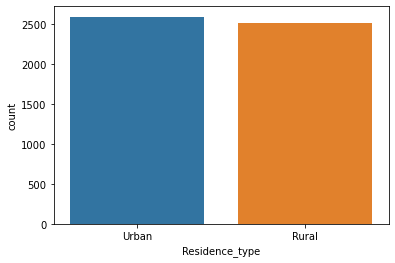

 

smoking_status:
never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


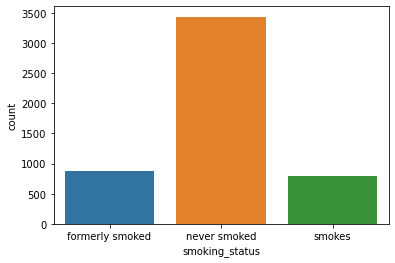

 

stroke:
0    4861
1     249
Name: stroke, dtype: int64



C:\Users\yusir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


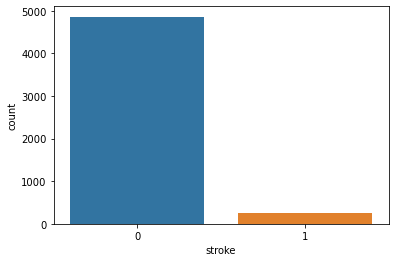

In [15]:
for col in value_cols:
    print(col+":")
    print(df[col].value_counts(), end='\n\n')
    sns.countplot(df[col])
    plt.show()
    print(' ', end='\n\n')

In [16]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

**The dataset is an imbalanced one**

### Bivariate and Multivariate Analysis

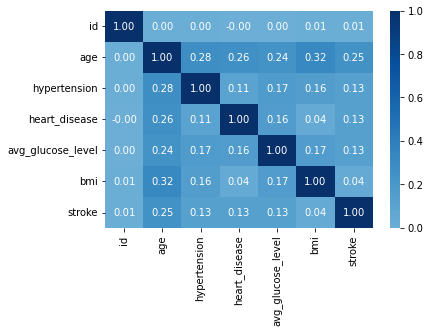

In [17]:
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = "Blues", center=0)
plt.show()

**There is very little correlation between the numerical columns in the dataset**

In [18]:
total_by_gender = df.groupby('gender').sum()[['stroke']].sort_values(by='stroke', ascending=False)
total_by_gender

,stroke
gender,
Female,141
Male,108
Other,0


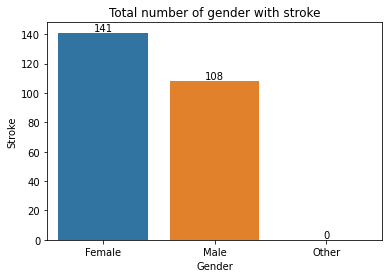

In [19]:
ax = sns.barplot(data = df, x = total_by_gender.index , y = total_by_gender['stroke'], errwidth = 0)
plt.xlabel('Gender')
plt.ylabel('Stroke')
plt.title('Total number of gender with stroke')
plt.bar_label(ax.containers[0])
plt.show()

**There are more females with stroke than males with stroke**

In [20]:
total_by_married = df.groupby('ever_married').sum()[['stroke']].sort_values(by = 'stroke', ascending = False)
total_by_married

,stroke
ever_married,
Yes,220
No,29


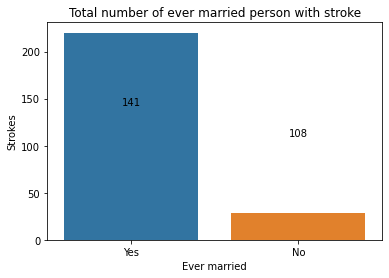

In [21]:
sns.barplot(data = df, x = total_by_married.index , y = total_by_married['stroke'], errwidth = 0)
plt.xlabel('Ever married')
plt.ylabel('Strokes')
plt.title('Total number of ever married person with stroke')
plt.bar_label(ax.containers[0])
plt.show()

**Individuals that were ever married had a way higher of number of strokes, than individuals that weren't**

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

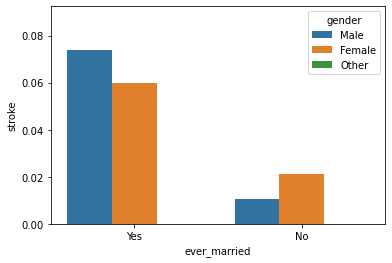

In [22]:
sns.barplot(data = df, x="ever_married", y="stroke", hue = "gender", errwidth=0)

**Above the married individuals, males had the higher number of strokes, and among the unmarried individuals, females had the higher number of strokes**

In [23]:
total_by_worktype = df.groupby('work_type').sum()[['stroke']].sort_values(by = 'stroke', ascending = False)
total_by_worktype

,stroke
work_type,
Private,149
Self-employed,65
Govt_job,33
children,2
Never_worked,0


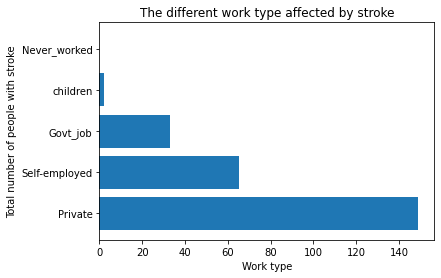

In [24]:
plt.barh(y= total_by_worktype.index, width=total_by_worktype['stroke'], data = df)
plt.xlabel('Work type')
plt.ylabel('Total number of people with stroke')
plt.title('The different work type affected by stroke')
plt.show()

**Individuals working privately had the highest recorded stroke occurence**

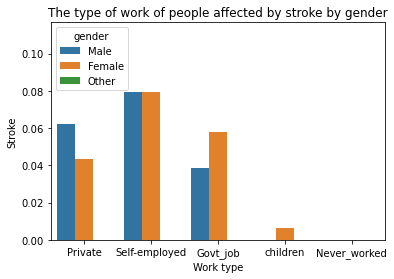

In [25]:
ax = sns.barplot(x = "work_type", y = "stroke", data = df, hue = "gender", errwidth=0)
plt.xlabel('Work type')
plt.ylabel('Stroke')
plt.title('The type of work of people affected by stroke by gender')
plt.show()

**Males working privately had a higher number of strokes compared to females, while females with government jobs or working with children had a higher number of strokes than males**

In [26]:
total_by_smoking_status = df.groupby(['smoking_status']).sum()[['stroke']].sort_values(by ='stroke', ascending = False)
total_by_smoking_status

,stroke
smoking_status,
never smoked,137
formerly smoked,70
smokes,42


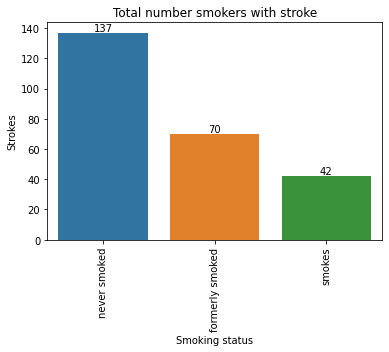

In [27]:
ax = sns.barplot(data = df, x = total_by_smoking_status.index , y = total_by_smoking_status['stroke'], errwidth = 0)
plt.xlabel('Smoking status')
plt.ylabel('Strokes')
plt.title('Total number smokers with stroke')
plt.xticks(rotation=90)
plt.bar_label(ax.containers[0])
plt.show()

**Individuals who never smoked had the highest recorded number of strokes. This is surprising because smoking is one of the risk factors of stroke**

## Machine Learning Modelling

### Data Preparation

In [28]:
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [29]:
#One Hot encoding of the categorical columns
df = pd.get_dummies(data=df, columns = cat_cols)

In [30]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0


In [31]:
df.drop('id', axis=1, inplace=True)

In [32]:
#Creating the dependent and independent arrays for machine learning
X = df.drop('stroke', axis=1)
y = df['stroke']

In [33]:
Counter(y)

Counter({1: 249, 0: 4861})

In [34]:
#Our dataset is an imbalanced one, using the oversampler to balance the dataset 
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=37)

In [35]:
X_over, y_over = oversampler.fit_resample(X,y)

In [36]:
Counter(y_over)

Counter({1: 4861, 0: 4861})

### Logistic Regression

In [37]:
lr_model = LogisticRegression()

In [38]:
cv = StratifiedKFold(n_splits=10)

In [39]:
pipeline = make_pipeline(MinMaxScaler(), LogisticRegression())
pipeline

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [40]:
scores = cross_val_score(pipeline, X_over, y_over, cv=cv, n_jobs=-1)
scores

array([0.76978417, 0.76978417, 0.76028807, 0.78395062, 0.74897119,
       0.76748971, 0.76131687, 0.77572016, 0.80761317, 0.78292181])

Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial

In [41]:
score = scores.mean()
score

0.7727839950262012

In [42]:
y_pred = cross_val_predict(pipeline, X_over, y_over, cv=cv, n_jobs=-1)

In [43]:
conf_mat_lr = confusion_matrix(y_over, y_pred)
pd.DataFrame(conf_mat_lr, columns=['Actual Negative', 'Actual Positive'], index=['Prediction Negative', 'Prediction Positive'])

,Actual Negative,Actual Positive
Prediction Negative,3563,1298
Prediction Positive,911,3950


In [44]:
class_report_lr = classification_report(y_over, y_pred, output_dict=True) 

In [45]:
class_report_lr = pd.DataFrame(class_report_lr)
class_report_lr

,0,1,accuracy,macro avg,weighted avg
precision,0.796379,0.752668,0.772783,0.774523,0.774523
recall,0.732977,0.812590,0.772783,0.772783,0.772783
f1-score,0.763364,0.781482,0.772783,0.772423,0.772423
support,4861.000000,4861.000000,0.772783,9722.000000,9722.000000


**Checking for overfitting/underfitting by examining the training and test score for a single train_test_split**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.15, random_state=3)

In [47]:
min_max = MinMaxScaler()

In [48]:
X_train_norm = min_max.fit_transform(X_train)

In [49]:
lr_model.fit(X_train_norm, y_train)

C:\Users\yusir\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
X_test_norm = min_max.transform(X_test)

In [51]:
lr_model.score(X_train_norm, y_train)

0.7741740288030982

In [52]:
lr_model.score(X_test_norm, y_test)

0.7717614804660726

In [53]:
y_pred_lr = lr_model.predict(X_test_norm)

In [54]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_lr)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_lr)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_lr)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_lr)))

Accuracy Score : 0.7717614804660726
Precision Score : 0.7544080604534005
Recall Score : 0.8127544097693351
F1 Score : 0.782495101241019


### Decision Tree

In [55]:
grid = {
    'max_depth' : [3,5,10,20,50,100, 150],
    'random_state' : [37]
}

In [56]:
dt_model = DecisionTreeClassifier()

In [57]:
dt_cv = GridSearchCV(estimator=dt_model, param_grid=grid, cv= cv)
dt_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 10, 20, 50, 100, 150],
                         'random_state': [37]})

In [58]:
dt_cv.best_params_

{'max_depth': 50, 'random_state': 37}

In [59]:
def DTClassifier(num):
    dt_model = DecisionTreeClassifier(max_depth=num, random_state=37)
    scores_dt = cross_val_score(dt_model, X_over, y_over, cv=cv, n_jobs=-1)
    score_dt = scores_dt.mean
    print(score_dt, end='\n\n')
    y_pred_dt = cross_val_predict(dt_model, X_over, y_over, cv=cv, n_jobs=-1)
    conf_mat_dt = confusion_matrix(y_over, y_pred_dt)
    conf_mat_dt = pd.DataFrame(conf_mat_dt, columns=['Actual Negative', 'Actual Positive'], index=['Prediction Negative', 'Prediction Positive'])
    print(conf_mat_dt, end='\n\n')
    class_report_dt = classification_report(y_over, y_pred_dt, output_dict=True)
    class_report_dt = pd.DataFrame(class_report_dt)
    print(class_report_dt)

In [60]:
DTClassifier(50)

<built-in method mean of numpy.ndarray object at 0x0000018974D30ED0>

                     Actual Negative  Actual Positive
Prediction Negative             4636              225
Prediction Positive                0             4861

                     0            1  accuracy    macro avg  weighted avg
precision     1.000000     0.955761  0.976857     0.977880      0.977880
recall        0.953713     1.000000  0.976857     0.976857      0.976857
f1-score      0.976308     0.977380  0.976857     0.976844      0.976844
support    4861.000000  4861.000000  0.976857  9722.000000   9722.000000


**Checking for overfitting by using a single train test split**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.15, random_state=3)

In [62]:
dt_model_t50 = DecisionTreeClassifier(max_depth=50, random_state=50)

In [63]:
dt_model_t50.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=50)

In [64]:
dt_model_t50.score(X_train, y_train)

1.0

In [65]:
dt_model_t50.score(X_test, y_test)

0.9787525702535984

In [66]:
y_pred_dt = dt_model_t50.predict(X_test)

In [67]:
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_dt)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_dt)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_dt)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_dt)))

Accuracy Score : 0.9787525702535984
Precision Score : 0.9596354166666666
Recall Score : 1.0
F1 Score : 0.9794019933554817


## Conclusion

We built 2 models for the prediction of whether a patient has stroke or not. 
The decision tree model has a better accuracy, precision, recall and f1 score than the logistic regression model.
The decision tree model will be deployed for future predictions of new patients